# Simulating non-native cubic interactions on noisy quantum machines

Link to paper: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.103.062608

Authors of paper: Yuan Shi, Alessandro R. Castelli, Xian Wu, Ilon Joseph, Vasily Geyko, Frank R. Graziani, Stephen B. Libby, Jeffrey B. Parker, Yaniv J. Rosen, Luis A. Martinez, and Jonathan L. DuBois

Author of notebook: [Óscar Amaro](https://github.com/OsAmaro)

TODO:
- plot dataWPD data points
- use qutip https://qutip.org/docs/4.0.2/index.html to reproduce fig2
- Instead of time-independent operator, $H_c$ depends on $c$ in an non-trivial way (see eq 12). Also, $\epsilon(t)$ has to be implemented.

In [ ]:
pip install qutip

In [8]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# Define Hamiltonian
H0 = qt.Qobj( np.diag([0, 25.758, 50.099, 72.848, 93.828]) )  # Define the bare Hamiltonian
Hc = qt.Qobj( np.roll(np.diag([1., -1.372,-1.618,1.781,0]),1) )  # Define the control Hamiltonian as a function of time

# Define Lindblad operators
L1 = qt.Qobj( np.roll(np.diag([0.004,0.006,0.007,0.009,0.]),1) ) # Decay operator
L2 = qt.Qobj( np.diag([0, 0.005, 0.014, 0.045, 0.000]) ) # Dephasing operator

# Initial state
rho0 = qt.ket2dm(qt.basis(5, 0)) #np.diag([1.0,0,0,0,0])  # Define the initial state of your system
#rho0

In [90]:
# Time points
times = np.linspace(0, 100, 100)  # Adjust as needed

# Solve the Lindblad master equation
result = qt.mesolve([H0, Hc], rho0, times, [L1, L2])

# result.states will contain the solution at each time point

In [91]:
occupations0 = []
occupations1 = []
occupations2 = []
for state in result.states:
    if state.type == 'ket':  # Convert to density matrix if state is a ket vector
        state = qt.ket2dm(state)
    occupation = np.real(state.diag())  # Extract diagonal elements and take the real part
    occupations0.append(occupation[0])
    occupations1.append(occupation[1])
    occupations2.append(occupation[2])

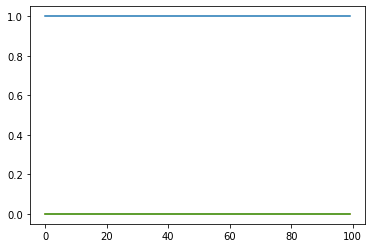

In [92]:
plt.plot(occupations0)
plt.plot(occupations1)
plt.plot(occupations2)